# OBJECTIVE 

**TO GAIN BETTER INSIGHTS FROM THE DATA & BUILD A MOST EFFECTIVE PREDICTIVE MODEL, THEREBY INCREASING THE PROFITABILITY OF THE COMPANY.**

# 1. UPLOAD THE FILE

## 1.1 Importing Packages

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from xgboost import XGBClassifier



## 1.2 Load the data

In [3]:
df = pd.read_csv(r'C:\Users\Bharath Setty\Desktop\Sriraksha\Data Science\2. Careerera  - DS Course\Capstone Project\E-Commerce\E_Commerce.csv')

In [4]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


## 1.3 Understand the data

In [5]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1



**About the Company**:  

It is an International **E-commerce Company selling Electronics**.  
The dataset contains **10999 observations of 12 variables**.  
  
The data contains the following information :  
 - **ID** : ID Number of Customers.    
 - **Warehouse block** : The Company have big Warehouse which is divided into blocks such as A,B,C,D,E.   
 - **Mode of shipment** : The Company Ships the products in multiple way such as Ship, Flight and Road.   
 - **Customer care calls** : The number of calls made from enquiry for enquiry of the shipment.    
 - **Customer rating** : The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).  
 - **Cost of the product** : Cost of the Product in US Dollars.    
 - **Prior purchases** : The Number of Prior Purchase.    
 - **Product importance** : The company has categorized the product in the various parameter such as low, medium, high.  
 - **Gender** : Male and Female.    
 - **Discount offered** : Discount offered on that specific product.  
 - **Weight in grams** : It is the weight in grams.  
 - **Reached on time** : It is the target variable, where 1 indicates that the product has NOT reached on time and 0 indicates it has reached on time.  



In [6]:
df.head(3)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [8]:
df.shape

(10999, 12)

# 2. IDENTIFYING MISSING & DUPLICATE VALUES :

In [9]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [10]:
df.isnull().values.any()

False

**Observation** :  
  
 - There are no missing values in this dataset.

In [11]:
df.duplicated().sum()

0

**Observations**:  
  
 - There are no duplicates values in the dataset.  

# 3.OUTLIER DETECTION   
  
**Using Boxplots**  

 - From the Description Table, we can observe that there is **some deviation in the data of some of the numerical columns**. 
 - So let us plot a **Box Plot** for all the numerical columns and observe the deviation.

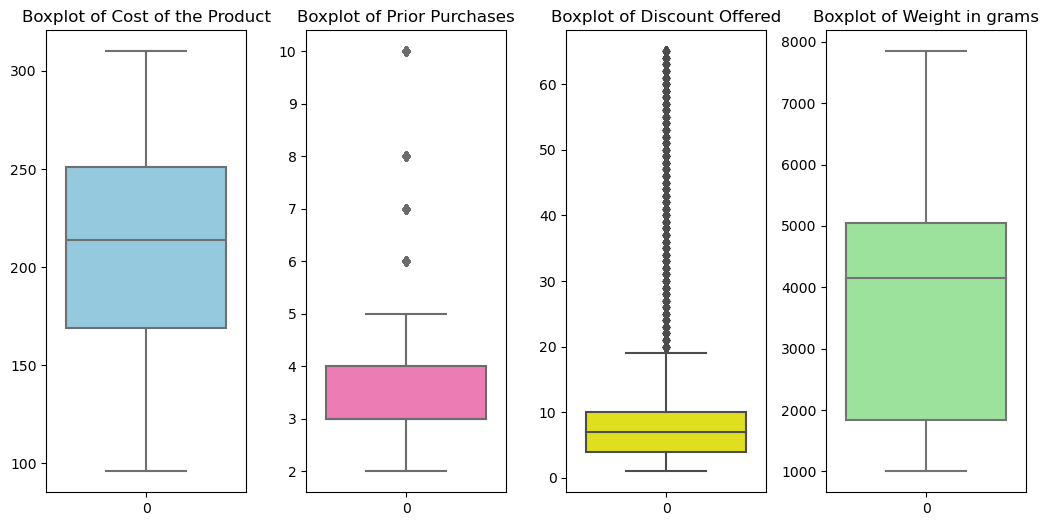

In [12]:
plt.figure(figsize=(16, 6))  # Adjust figure size

plt.subplot(151)
sns.boxplot(df['Cost_of_the_Product'], color='skyblue')
plt.title('Boxplot of Cost of the Product')

plt.subplot(152)
sns.boxplot(df['Prior_purchases'], color='hotpink')
plt.title('Boxplot of Prior Purchases')

plt.subplot(153)
sns.boxplot(df['Discount_offered'], color='yellow')
plt.title('Boxplot of Discount Offered')

plt.subplot(154)
sns.boxplot(df['Weight_in_gms'], color='lightgreen')
plt.title('Boxplot of Weight in grams')

plt.subplots_adjust(wspace=0.30)  # Adjust spacing between subplots
plt.show()

- The boxplots of each numerical feature above is providing their respective **five number summary (min,Q1,Q2,Q3 & max values)**.
- We can also observe that the 2 columns 'Cost_of_the_product', 'Weight_in_gms' do not have any outliers while the other 2 columns, **'Prior Purchases' & 'Discount Offered' have outliers**.    
- For the purpose of this project, **the outliers are not removed** since usually in real world, we take the advice of the domain experts to decide upon & remove the outliers also the data that seems like outliers at times might not be actual outliers & can be part of important data.


# 4. FEATURE ENGINEERING    
      
## 4.1 Transforming an existing feature column   
**[by converting 'Customer_care_calls' (numerical column) into a 'Customer_care_calls_categorical' (categorical column)]**.    
    
 - I am converting 'Customer_care_calls' numerical column having numerical data into categories so that it helps in a better analysis of data & conclusions.      
 - The **Customer_care_calls** column contains values containing numbers ranging from 2 to 7 in the current dataframe.       
  - I am converting the data into 4 categories, such as :    
             1) 0 - 'No calls' category   
             2) 1,2 - 'low' category   
             3) 3,4 - 'medium' category    
             4) 5,6,7 or more - 'high' category     
    

In [13]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [217]:
df2 = df.copy()

# Define thresholds for categorization
bins = [0, 1, 3, 5, float('inf')]  # Define your own thresholds here

# Define labels for the categories
labels = ['No_calls','Low', 'Medium', 'High']

# Create a new categorical column based on the thresholds
df2['Customer_care_calls_category'] = pd.cut(df2['Customer_care_calls'], bins=bins, labels=labels, right=False)

# Display the DataFrame with the new categorical column
df2.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Customer_care_calls_category
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,Medium
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,Medium
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,Low
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,Medium
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,Low


## 4.2 Creating a new feature column 
**[by combining 'Discount_offered' column with 'Cost_of_the_product' column into a new column - 'Final_price]**.  
  
 - I am creating a new column called 'Final_price' by applying the discount on the cost of the product.
 - It can help in better analysis of the data
  

In [15]:
df2.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Customer_care_calls_category
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,Medium
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,Medium
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,Low
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,Medium
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,Low


In [16]:
df3 = df2.copy()
df3['Final_price'] = (df3['Cost_of_the_Product'] * (100 - df3['Discount_offered'])) / 100
df3.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Customer_care_calls_category,Final_price
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,Medium,99.12
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,Medium,88.56
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,Low,95.16
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,Medium,158.40
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,Low,99.36


# 5. Categorizing the numerical, categorical & target columns.


In [17]:

num_features = df3[['Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms','Final_price']]
cat_features = df3[['Warehouse_block','Mode_of_Shipment','Customer_rating','Product_importance','Gender','Customer_care_calls_category']]

tar_feature = df3['Reached.on.Time_Y.N']
                   
# columns that are not needed for further analysis are, 'ID', 'Customer_care_calls'

# 6. EDA

## 6.1 Summary Statistics

In [18]:
df3.shape

(10999, 14)

In [19]:
# performing descriptive statistics for numerical columns to get an understanding of data distribution

df3[['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms','Final_price']].describe()

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Final_price
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,210.196836,3.567597,13.373216,3634.016729,183.163959
std,1.141490,48.063272,1.522860,16.205527,1635.377251,56.907273
min,2.000000,96.000000,2.000000,1.000000,1001.000000,36.630000
25%,3.000000,169.000000,3.000000,4.000000,1839.500000,140.150000
50%,4.000000,214.000000,3.000000,7.000000,4149.000000,186.240000
75%,5.000000,251.000000,4.000000,10.000000,5050.000000,231.280000
max,7.000000,310.000000,10.000000,65.000000,7846.000000,306.900000


**Observations**:  

Let us have a quick overview of the distribution & spread of the numerical data in our dataframe & understand the characteristics of each column.  
  
**Customer Care Calls** :  
 - For my analysis, I have created a new categorical column 'Customer_care_calls_category' however I can still analyse the numerical column and come up with observations.
 - On an average we can observe that 4 calls are made by a customer to enquire about the shipment of the product with each customer calling a **minimum of 2 times to max of 7 times**.   
 - This clearly states that there are chances that there is **no clarity regarding the shipping status details provided by the company to the customers**.    
 - Since this being an ecommerce platform mainly, clarity to the customer regarding their shipping status becomes very important.   
 - So the company might have to cross check the shipment delivery status update given to the customers. If the shipment status was provided time to time to the customer over website, mail, app or their profile, we might not have received calls from the customers firstly regarding shipment status.   
 - So there are high chances there is some flaw in the current system being followed regarding the shipment status provided to the customers.  
    
**Cost of the product** :  
 - The average cost of the product ordered by the customers is around **210 US Dollars** with **96 US Dollars being the min & 310 US Dollars being the maximum**.  
 - So the company is currently selling products in the range of 96 US Dollars to 310 US dollars.  
 - 25% of the products currently purchased by the customer is costing upto 173 US dollars while half of the products sold is less than or equal to 220US Dollars also **75% of the products currently sold are less than or equal to 254 US Dollars**.  
 - Since this is an E-Commerce company, the main focus will be into online product sales, so may be we can try to have more products around this price range as we will be able to provide more choice options for customers for their purchase.  
    
**Prior Purchases** :   
 - On an average we can see that each customer has prior 3 purchase orders ranging from **2 to 10 prior orders while 75% of customers prior purchase orders being around 4**.  
 - Meaning we are having quite a lot of repeat customers.   
 - So may be there is something that our customers are liking in our services that we are currently catering to them. We can try understanding them if possible, so that it can be strengthened further.  
 - Also since we have mostly repeat customers, may be we should also focus on building strategies to get new customers through building brand awareness, creating greater access towards reaching new customers etc. 
  
**Discount Offered** :  
 - We can observe on an average 13% discounted products are being purchased, with **min discount of 1% and max of 65%. Also 75% of the purchases being made are those with less than or equal to 10%**.   
   
**Weight in gms** :  
 - On an average, we find the product weight being shipped is 3634gms with a deviation of around 1635gms having a **min weight of  1001gms to max of 7846gms**.   
 - Also 75% of the products being shipped are lesser than or equal to 5050gms.  
 - So the company needs to make a note of these weight deviations and ranges about their products so that it can help them during the shipping of products as they can come up with plans/strategies to reduce shipping costs or choose an appropriate/most suitable shipping process. 
  
**Final_price**  
 - On an average customers are purchasing products at 183 US Dollars.   
 - Also the **minimum final price** purchased by the customer is at **36 US Dollars & max being 306 US Dollars**.
 - We can also see there exists substantiate deviation in the data from min to Q1.  
 - The company may also note these price ranges for their strategies.  


## 6.2 Univariate Analysis

### 6.2.1 Plotting Histograms (for numerical features)

### (i) Cost of the Product

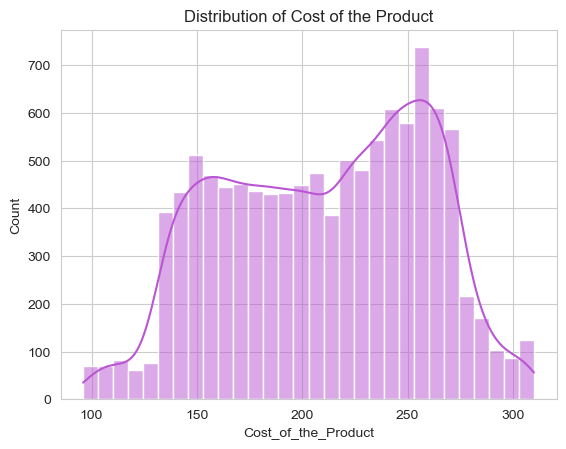

In [30]:
sns.histplot(df3['Cost_of_the_Product'], kde=True, color='mediumorchid')
sns.set_style("whitegrid")  
plt.title('Distribution of Cost of the Product')
plt.show()


### (ii) Weight_in_gms

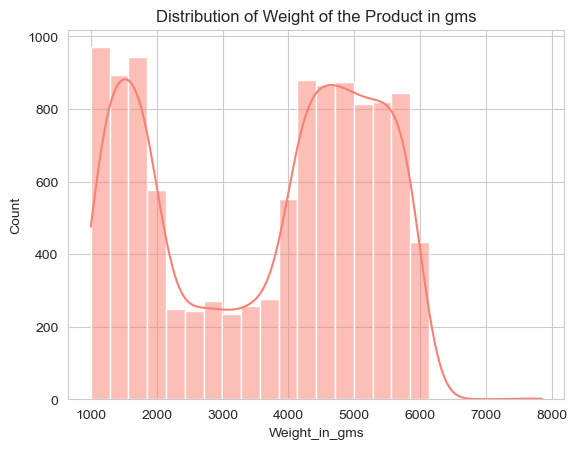

In [31]:
sns.histplot(df3['Weight_in_gms'], kde=True, color='salmon')
sns.set_style("whitegrid")  
plt.title('Distribution of Weight of the Product in gms')
plt.show()

### (iii) Final_price

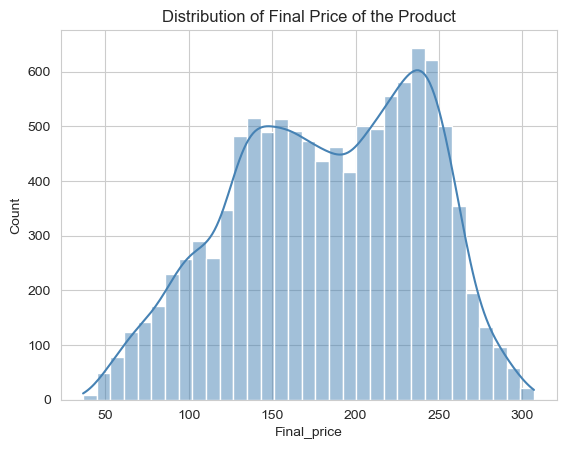

In [32]:
sns.histplot(df3['Final_price'], kde=True, color='steelblue')
sns.set_style("whitegrid")  
plt.title('Distribution of Final Price of the Product')
plt.show()

#### Observations :  
 - All 3 columns do not show a normal distribution.
 - We can observe multiple peaks in kde, indicating there can be distinct subgroups or clusters within the data.


### 6.2.2 Plotting Piecharts (for categorical data)

Piecharts are plotted for the following categorical features having 2 or 3 categories & the target variable :  
     - 'Mode_of_Shipment'  
     - 'Product_importance'  
     - 'Gender'  
     - 'Reached.on.Time_Y.N'  

#### 6.2.2.A Mode of Shipment

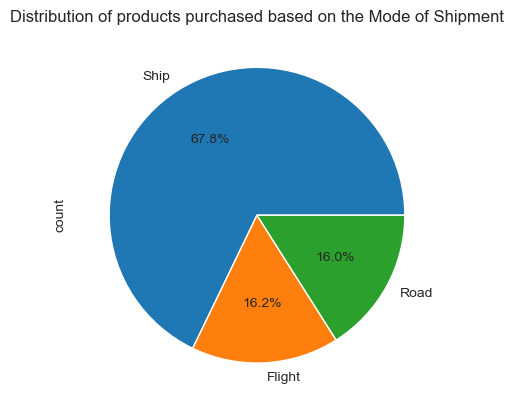

In [66]:
df3['Mode_of_Shipment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of products purchased based on the Mode of Shipment')
plt.show()

**Observation**:  
  
- The shipment of the product is done by 3 modes currently that is by Ship, Flight & over Road.
- But we can find that **the majority of mode used for around 67% is happening through 'Shipping'** while the other 2 shipments modes like **flight & road constituting to around 16% each**, which is less as compared to shipping.
- So the company can focus more on the shipping mode & try to enhance its services & processes to make it cost effective.

#### 6.2.2.B Product Importance

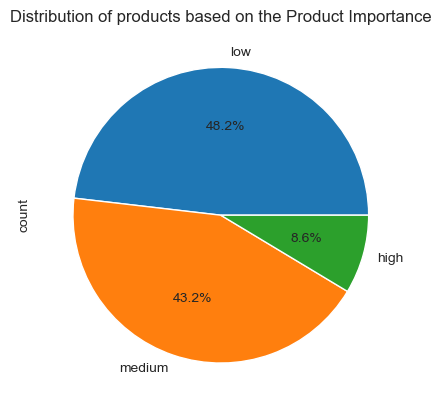

In [67]:
df3['Product_importance'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of products based on the Product Importance')
plt.show()

**Observations** :  
  
- The company has categorized its products into 3 categories based on its importance such as low, medium & high important products.
- We can observe that **medium & low importance category products are having majority of the sales & form around 90% of the total sales**.
- While the product importance of high marked category has less sales. 

#### 6.2.2.C Gender

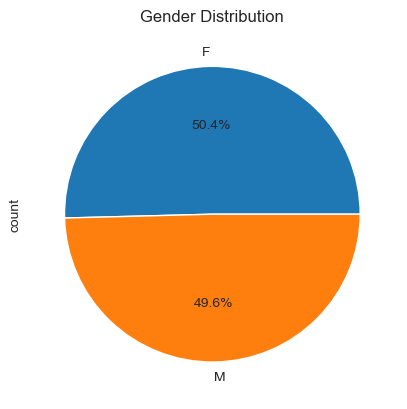

In [40]:
df3['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

**Observations** :  
  
- The company currently has approximately **equal distribution of male & female customers** when it comes to sales by gender.  
- So this makes it important for the company to focus on both the genders.


#### 6.2.2.D Reached On Time - 'Yes or No'

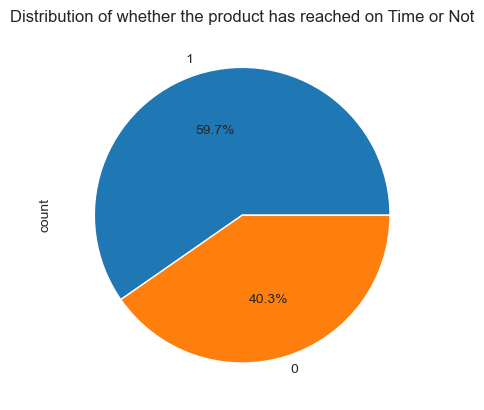

In [41]:
df3['Reached.on.Time_Y.N'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of whether the product has reached on Time or Not')
plt.show()

**Observations**:  
 - We can clearly observe that around **60% of the products have not reached on time while around 40% of the products have reached on time**. 
 - The company should immediately start focusing on making sure the products reach customers on time.
 - An e-commerce company cannot afford to delay the delivery of products to their customers & especially at such high percentages.
 - Well from the analysis perspective, this is a balanced dataset.

### 6.2.3 Plotting barcharts & piecharts (for catgorical features having more than 3 categories)  

#### 6.2.3.A Customer Care Calls (Category)

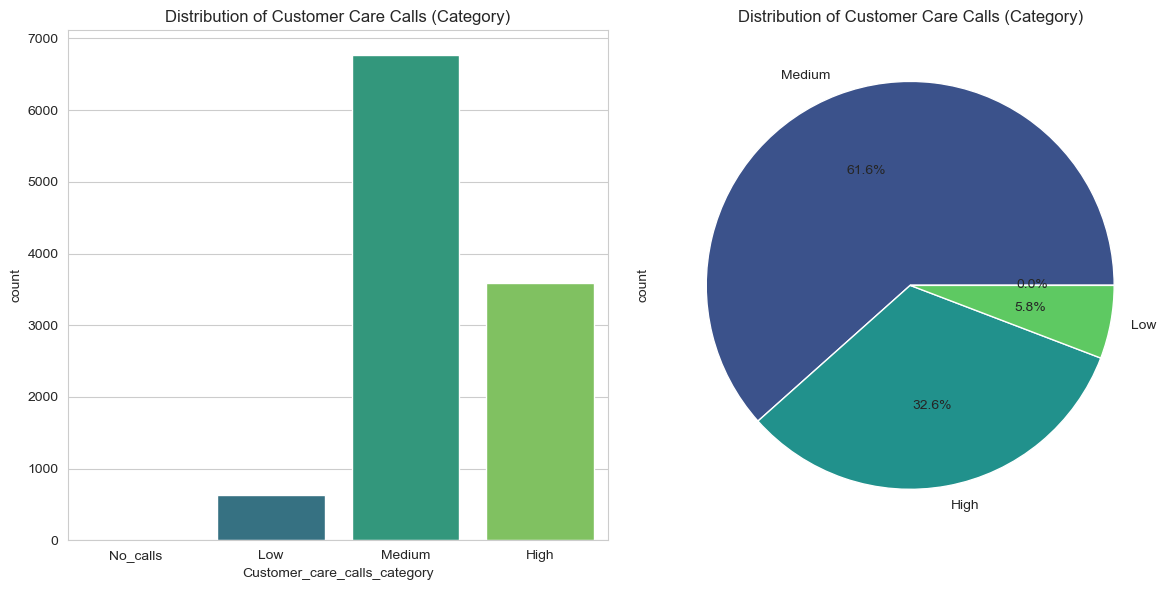

In [52]:
# Set up the figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart
sns.countplot(x='Customer_care_calls_category', data=df3, ax=axs[0], palette='viridis')
axs[0].set_title('Distribution of Customer Care Calls (Category)')

# Pie chart
df3['Customer_care_calls_category'].value_counts().plot(kind='pie', ax=axs[1], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(df3['Customer_care_calls_category'].unique())))
axs[1].set_title('Distribution of Customer Care Calls (Category)')

# Show plots
plt.tight_layout()
plt.show()


**Observations** :  
  
- For the purpose of better understanding I have categorised the data of the number of customer care calls into 4 categories - no calls(0), low calls(1,2), medium calls(3,4) & high calls received by the customer regarding their shipping status(5,6,7 or more).  
- We can observe **that every customer is calling the company** to enquire about the shipment status.  
- The company needs to immediately start focusing on providing a proper shipping status update to the customers as well as make sure it gets delivered on time or at the earliet possible time.  
- We can also observe that around **60% of the customers are calling the company 3 to 4 times** & whereas around **32% of the customers are making very high number of calls(5,6,7)** to enquire about the shipping status. This doesnt seem very positive, just imagine the frustration of customers of not knowing when there products are getting delivered, also calling repeatedly to check the status & to make their plans according to the product delivery time(sometimes customers might have purchased something for as a gift or urgency - so delaying delivery at such times can just make the company lose a customer at most times)  
- The company currently seems to have a very big problem with the shipment delivery since customers are calling so many number of times to check the shipment status.   

#### 6.2.3.B Warehouse Block

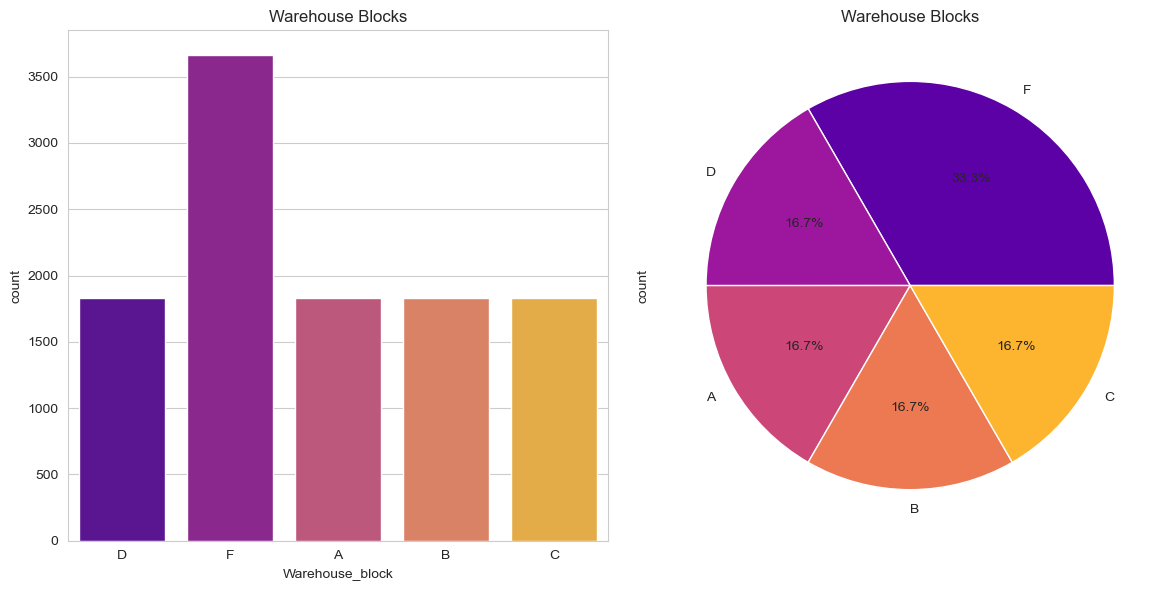

In [51]:
# Set up the figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart
sns.countplot(x='Warehouse_block', data=df3, ax=axs[0], palette='plasma')
axs[0].set_title('Warehouse Blocks')

# Pie chart
df3['Warehouse_block'].value_counts().plot(kind='pie', ax=axs[1], autopct='%1.1f%%', colors=sns.color_palette('plasma', len(df3['Warehouse_block'].unique())))
axs[1].set_title('Warehouse Blocks')

# Show plots
plt.tight_layout()
plt.show()


**Observations** :
- Block F is a warehouse from which around **33% of the products are picked/shipped from** while all the other 4 blocks such as **A,B,C,D have equal distribution of around 16%** for product shipment.
- So we can also state that, the existence of all the warehouse blocks seems to be important for the company currently with block F being bit high priority.

#### 6.2.3.C Customer Rating

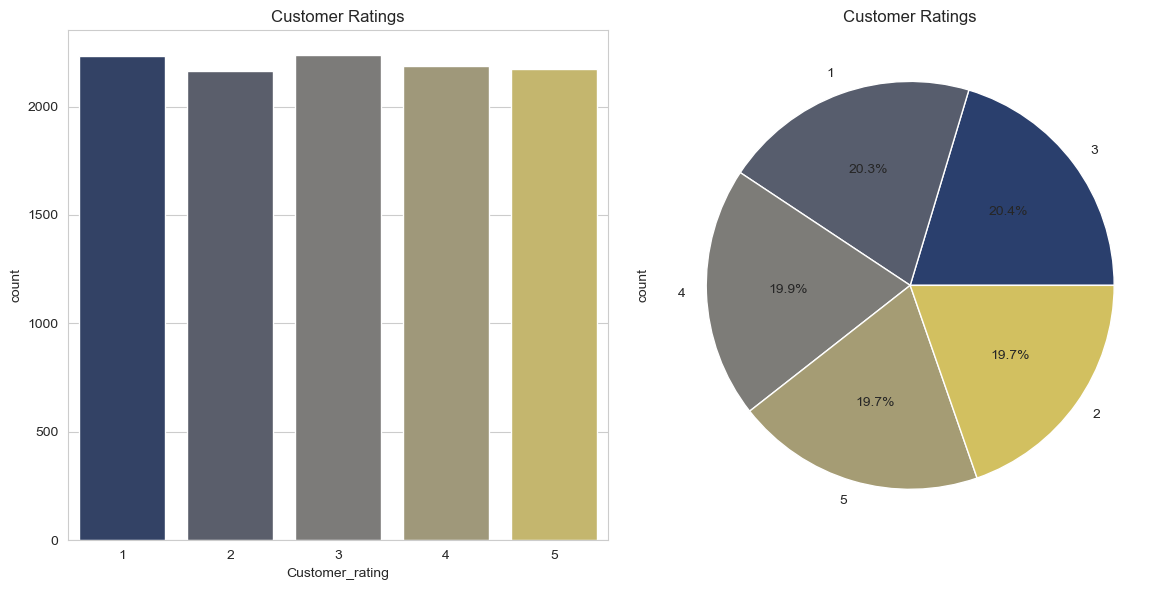

In [55]:
# Set up the figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart
sns.countplot(x='Customer_rating', data=df3, ax=axs[0], palette='cividis')
axs[0].set_title('Customer Ratings')

# Pie chart
df3['Customer_rating'].value_counts().plot(kind='pie', ax=axs[1], autopct='%1.1f%%', colors=sns.color_palette('cividis', len(df3['Customer_rating'].unique())))
axs[1].set_title('Customer Ratings')

# Show plots
plt.tight_layout()
plt.show()


**Observations**:  
  
- We can observe that **all groups of customer ratings lie around the same percentage of 20%**.
- But if a company has such a count in customer rating categories, this is something the company must focus on, **around 60% of the customer are rating the company from worst to moderate while only around 40% customers are providing ratings on the higher side**.
- The company should focus on gaining/collecting more information as feedback and find out as to why such huge percentage of customers are providing such worst to moderate ratings so that they can focus on improvising the current bottlenecks & improvise the company's processing in order to have a good brand image.  
- This being an ecommerce platform, customer ratings play a very important role and greatly impact the future customer purchases.  

## 6.3 Bivariate Analysis

### 6.3.1 Numeric features & categorical target  
 
 - (i)  'Cost_of_the_Product' & 'Reached.on.Time_Y.N'.  
 - (ii) 'Prior_purchases' & 'Reached.on.Time_Y.N'.  
 - (iii)'Discount_offered' & 'Reached.on.Time_Y.N'.  
 - (iv) 'Weight_in_gms' & 'Reached.on.Time_Y.N'.  
 - (v)  'Final_price' & 'Reached.on.Time_Y.N'.  
 

#### (i)  'Cost_of_the_Product' & 'Reached.on.Time_Y.N'.

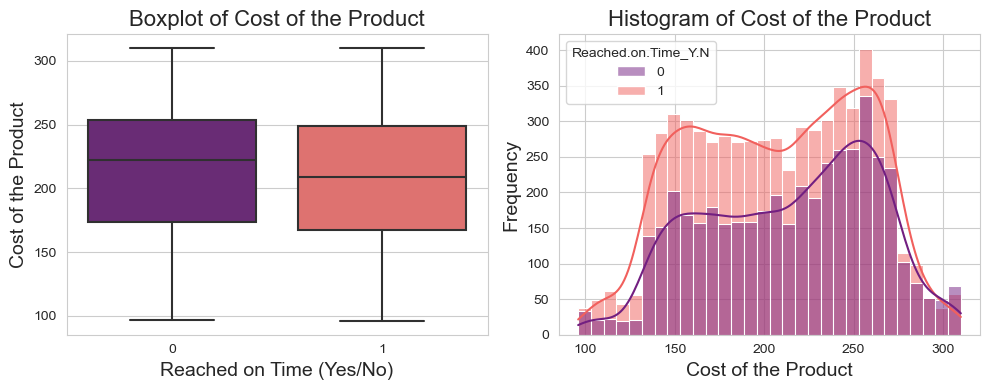

In [104]:
# Set the style for seaborn
sns.set_style("whitegrid")

# Define the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot a boxplot
sns.boxplot(x="Reached.on.Time_Y.N", y="Cost_of_the_Product", data=df3, palette="magma", ax=axes[0])
axes[0].set_title("Boxplot of Cost of the Product", fontsize=16)
axes[0].set_xlabel("Reached on Time (Yes/No)", fontsize=14)
axes[0].set_ylabel("Cost of the Product", fontsize=14)

# Plot a histogram
sns.histplot(data=df3, x="Cost_of_the_Product", hue="Reached.on.Time_Y.N", palette="magma", kde=True, ax=axes[1])
axes[1].set_title("Histogram of Cost of the Product", fontsize=16)
axes[1].set_xlabel("Cost of the Product", fontsize=14)
axes[1].set_ylabel("Frequency", fontsize=14)

# Show the plots
plt.tight_layout()
plt.show()


**Observations** :-  
  
**Boxplot**:  
 - The boxplot shows the distribution of cost of the product for 2 categories that is delivery on time status: yes or no.  
 - The 5 number summary remains almost same for the 2 categories with regard to cost of the product.
    
**Histogram**:    
 - The histogram provides a visual representation of the frequency distribution of the cost of the product for each category of delivery on-time status.    
 - By overlaying the histograms for both "Yes" and "No" delivery on-time status, we can directly compare their distributions.   
 - We may observe that the **products with higher cost have not been delivered on time as compared to products with lower cost that are delivered on time** & the peak is ranging from around **240 US Dollars to 260 US Dollars** for both the categories.  
   

#### (ii) 'Prior_purchases' & 'Reached.on.Time_Y.N'.

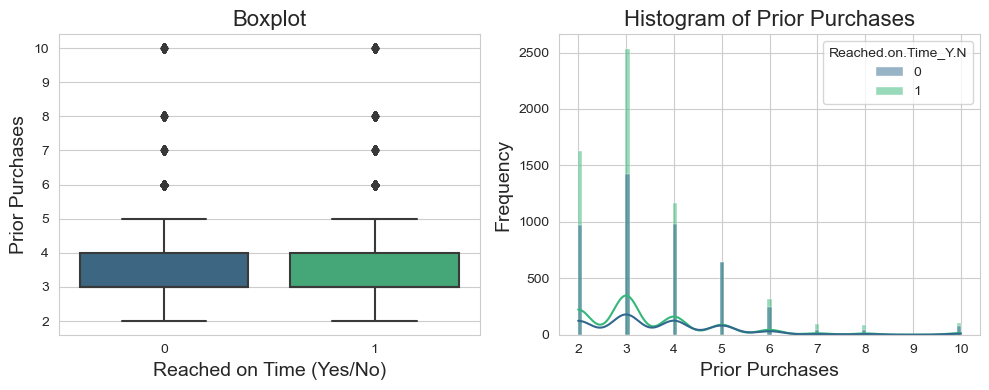

In [105]:
# Set the style for seaborn
sns.set_style("whitegrid")

# Define the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot a bar chart
sns.boxplot(x="Reached.on.Time_Y.N", y="Prior_purchases", data=df3, palette="viridis", ax=axes[0])
axes[0].set_title("Boxplot", fontsize=16)
axes[0].set_xlabel("Reached on Time (Yes/No)", fontsize=14)
axes[0].set_ylabel("Prior Purchases", fontsize=14)

# Plot a histogram
sns.histplot(data=df3, x="Prior_purchases", hue="Reached.on.Time_Y.N", palette="viridis", kde=True, ax=axes[1])
axes[1].set_title("Histogram of Prior Purchases", fontsize=16)
axes[1].set_xlabel("Prior Purchases", fontsize=14)
axes[1].set_ylabel("Frequency", fontsize=14)

# Show the plots
plt.tight_layout()
plt.show()


**Observations**:-  

**Boxplot** :
 - We can observe some outliers in both the categories of reached on time or not based on the prior purchases.

**Histogram** :
 - We may see that their is some delay in the products delivered to customers having 2 & 3 prior purchases than other number of purchases made.
    

#### (iii) 'Discount_offered' & 'Reached.on.Time_Y.N'.

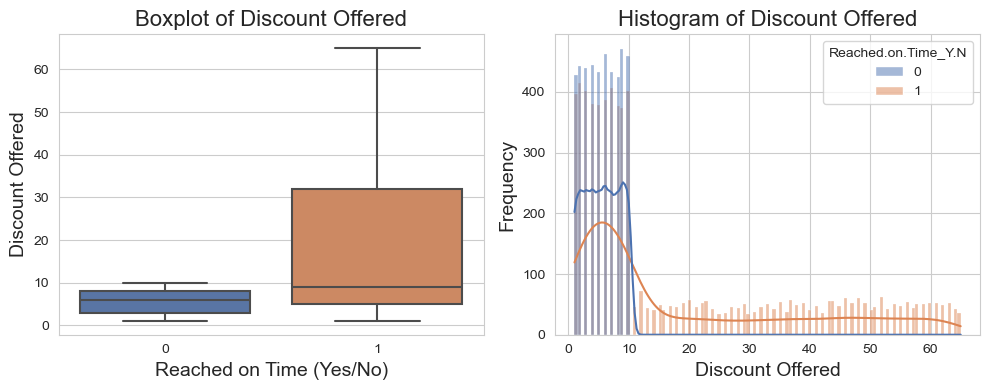

In [111]:
# Set the style for seaborn
sns.set_style("whitegrid")

# Define the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot a boxplot
sns.boxplot(x="Reached.on.Time_Y.N", y="Discount_offered", data=df3, palette="deep", ax=axes[0])
axes[0].set_title("Boxplot of Discount Offered", fontsize=16)
axes[0].set_xlabel("Reached on Time (Yes/No)", fontsize=14)
axes[0].set_ylabel("Discount Offered", fontsize=14)

# Plot a histogram
sns.histplot(data=df3, x="Discount_offered", hue="Reached.on.Time_Y.N", palette="deep", kde=True, ax=axes[1])
axes[1].set_title("Histogram of Discount Offered", fontsize=16)
axes[1].set_xlabel("Discount Offered", fontsize=14)
axes[1].set_ylabel("Frequency", fontsize=14)

# Show the plots
plt.tight_layout()
plt.show()


**Observations**:  
 
**Boxplot** :
 - We may observe that the products having discounts of 0-10% have reached customers on time as compared to those products having discount upto around 67% which have not reached on time.
 
**Histogram** :
 - It is clearly evident that many of products with 0-10% discounts are reaching customers on time while most products having discounts in the range of upto 65% are not reaching customers on time.


#### (iv) 'Weight_in_gms' & 'Reached.on.Time_Y.N'.

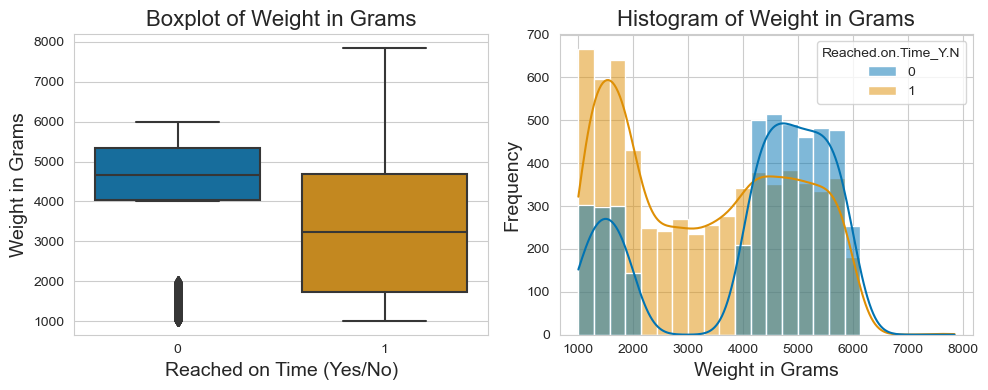

In [108]:
# Set the style for seaborn
sns.set_style("whitegrid")

# Define the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot a boxplot
sns.boxplot(x="Reached.on.Time_Y.N", y="Weight_in_gms", data=df3, palette="colorblind", ax=axes[0])
axes[0].set_title("Boxplot of Weight in Grams", fontsize=16)
axes[0].set_xlabel("Reached on Time (Yes/No)", fontsize=14)
axes[0].set_ylabel("Weight in Grams", fontsize=14)

# Plot a histogram
sns.histplot(data=df3, x="Weight_in_gms", hue="Reached.on.Time_Y.N", palette="colorblind", kde=True, ax=axes[1])
axes[1].set_title("Histogram of Weight in Grams", fontsize=16)
axes[1].set_xlabel("Weight in Grams", fontsize=14)
axes[1].set_ylabel("Frequency", fontsize=14)

# Show the plots
plt.tight_layout()
plt.show()


**Observations**:  

**Boxplot** : 
 - Products having weight in the range of 4000gms to 6000gms with some outliers have reached customers on time & many products in the range of 1000gms to 8000gms have not reached customers on time.
 
**Histogram** :
 - Many products in the range of 1000gms to 4200gms are not reaching customers on time while many products in the range of 4300gms to 6000gms are reaching the customers on time.


#### (v) 'Final_price' & 'Reached.on.Time_Y.N'.

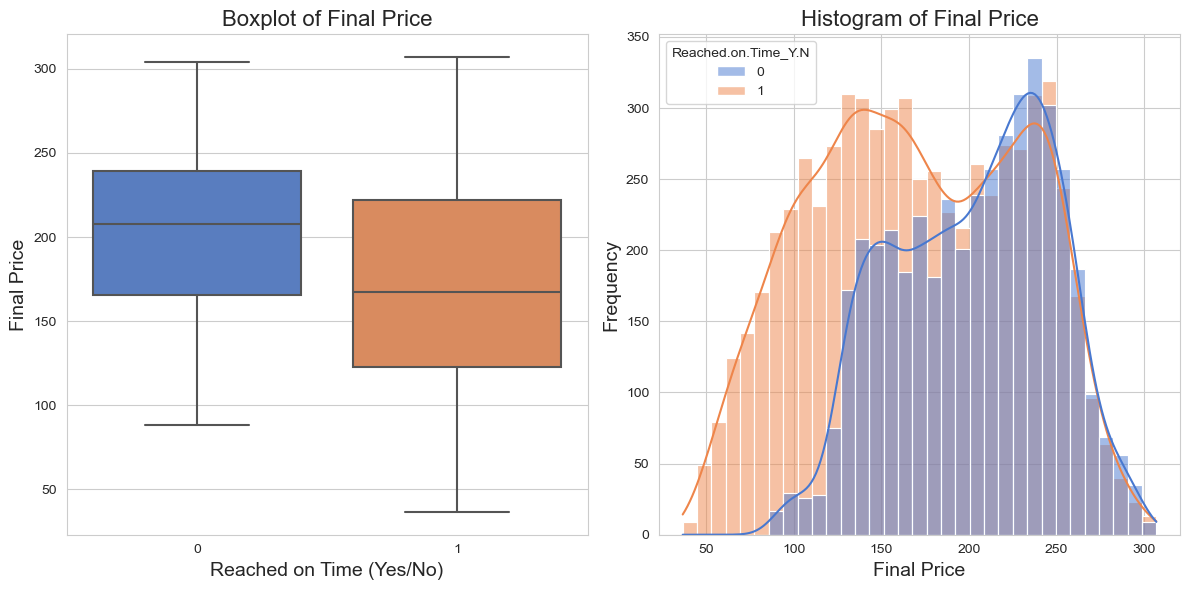

In [114]:
# Set the style for seaborn
sns.set_style("whitegrid")

# Define the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot a boxplot
sns.boxplot(x="Reached.on.Time_Y.N", y="Final_price", data=df3, palette="muted", ax=axes[0])
axes[0].set_title("Boxplot of Final Price", fontsize=16)
axes[0].set_xlabel("Reached on Time (Yes/No)", fontsize=14)
axes[0].set_ylabel("Final Price", fontsize=14)

# Plot a histogram
sns.histplot(data=df3, x="Final_price", hue="Reached.on.Time_Y.N", palette="muted", kde=True, ax=axes[1])
axes[1].set_title("Histogram of Final Price", fontsize=16)
axes[1].set_xlabel("Final Price", fontsize=14)
axes[1].set_ylabel("Frequency", fontsize=14)

# Show the plots
plt.tight_layout()
plt.show()


**Observations**: 

**Boxplot** : 
 - Products having a final price of around 30US Dollars to 80US Dollars are not reaching the customers on time.
 
**Histogram** :
 - Products with final price in the range of 200US Dollars to 300US Dollars are almost equally divided in reaching customers on time & not reaching them on time while many products with final price in the range of 30US Dollars to 200US Dollars are not reaching customers on time.
  

### 6.3.2 Categorical features & categorical target  
 
 - (i)  'Warehouse_block' & 'Reached.on.Time_Y.N'.  
 - (ii) 'Mode_of_Shipment' & 'Reached.on.Time_Y.N'.  
 - (iii)'Customer_rating' & 'Reached.on.Time_Y.N'.  
 - (iv) 'Product_importance' & 'Reached.on.Time_Y.N'.  
 - (v)  'Gender' & 'Reached.on.Time_Y.N'. 
 - (vi) 'Customer_care_calls_category' & 'Reached.on.Time_Y.N'.
 

#### (i)  'Warehouse_block' & 'Reached.on.Time_Y.N'.

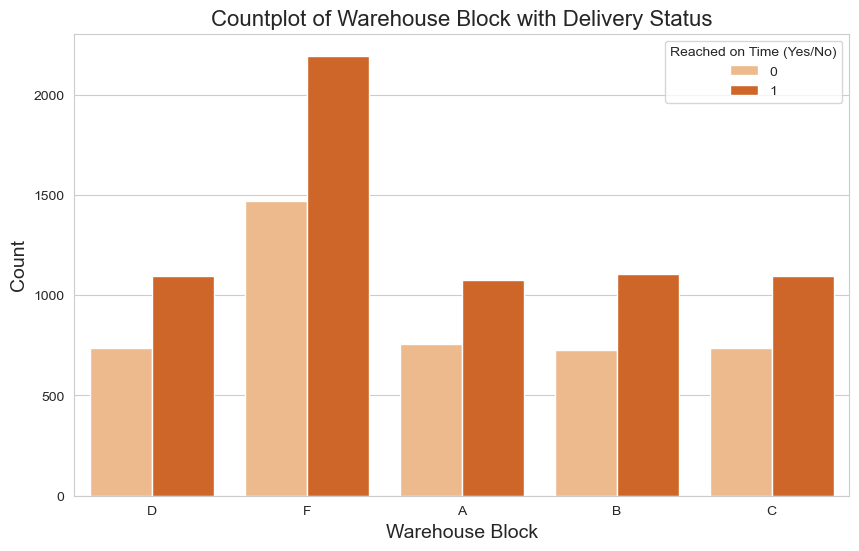

In [152]:

# Set the style for seaborn
sns.set_style("whitegrid")

# Define the figure and axis
plt.figure(figsize=(10, 6))

# Plot a countplot with hue
sns.countplot(data=df3, x="Warehouse_block", hue="Reached.on.Time_Y.N", palette="Oranges")

# Set title and labels
plt.title("Countplot of Warehouse Block with Delivery Status", fontsize=16)
plt.xlabel("Warehouse Block", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Show the plot
plt.legend(title="Reached on Time (Yes/No)")
plt.show()


**Observations**:  
  
 - Warehouse Block 'F' has a huge number of products that are not being delivered on time.
 - All the blocks have higher number of products that are not reaching customers on time as compared to the number of products reaching customers on time. 
  

#### (ii) 'Mode_of_Shipment' & 'Reached.on.Time_Y.N'.

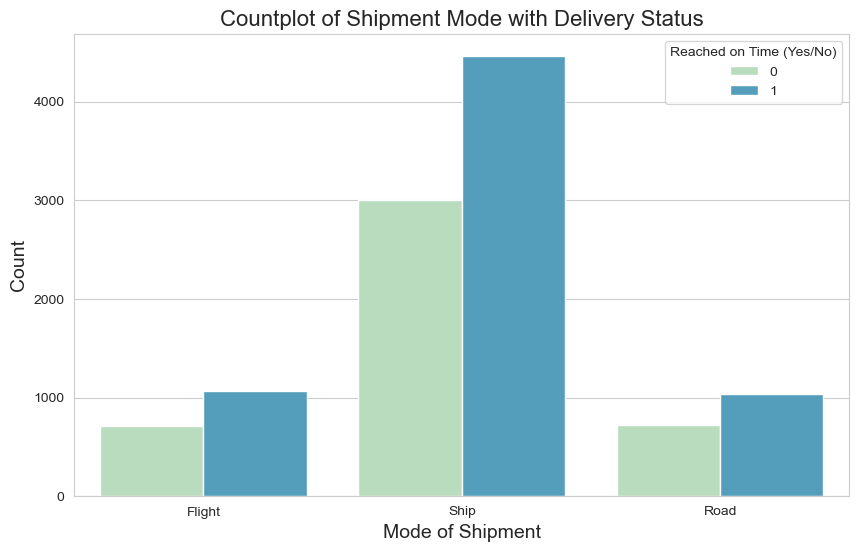

In [129]:

# Set the style for seaborn
sns.set_style("whitegrid")

# Define the figure and axis
plt.figure(figsize=(10, 6))

# Plot a countplot with hue
sns.countplot(data=df3, x="Mode_of_Shipment", hue="Reached.on.Time_Y.N", palette="GnBu")

# Set title and labels
plt.title("Countplot of Shipment Mode with Delivery Status", fontsize=16)
plt.xlabel("Mode of Shipment", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Show the plot
plt.legend(title="Reached on Time (Yes/No)")
plt.show()


**Observations**:

 - All the 3 modes of shipments have greater number of products that are not reaching customers on time with 'shipping' mode being the highest.
 

#### (iii)'Customer_rating' & 'Reached.on.Time_Y.N'.

#### What was Customer Rating? And was the product delivered on time?

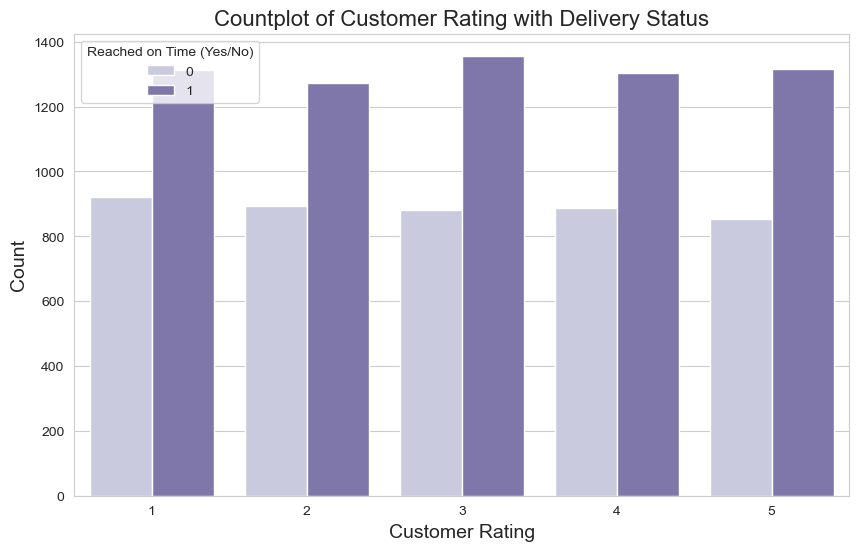

In [153]:

# Set the style for seaborn
sns.set_style("whitegrid")

# Define the figure and axis
plt.figure(figsize=(10, 6))

# Plot a countplot with hue
sns.countplot(data=df3, x="Customer_rating", hue="Reached.on.Time_Y.N", palette="Purples")

# Set title and labels
plt.title("Countplot of Customer Rating with Delivery Status", fontsize=16)
plt.xlabel("Customer Rating", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Show the plot
plt.legend(title="Reached on Time (Yes/No)")
plt.show()


**Observations**:  

 - No matter what the customer rating is, all the categories of customer ratings have a higher number of products that are not delivered on time.    

#### (iv) 'Product_importance' & 'Reached.on.Time_Y.N'.

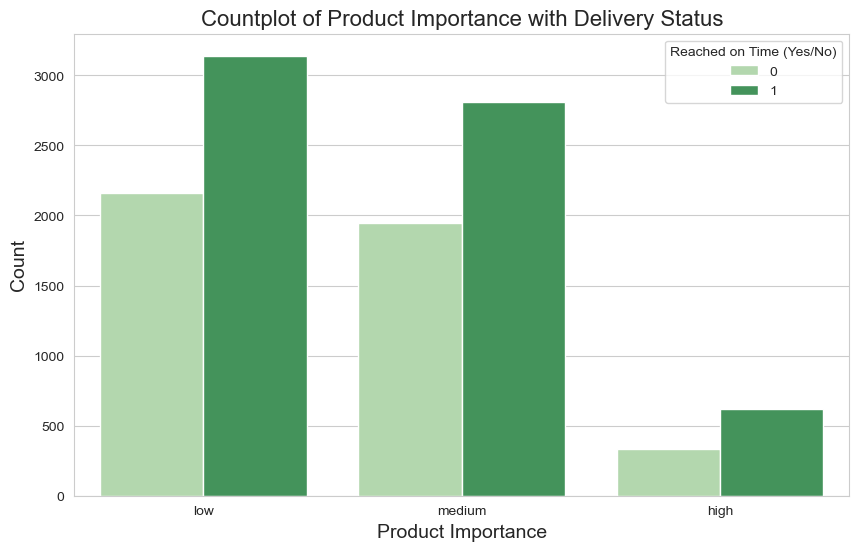

In [147]:

# Set the style for seaborn
sns.set_style("whitegrid")

# Define the figure and axis
plt.figure(figsize=(10, 6))

# Plot a countplot with hue
sns.countplot(data=df3, x="Product_importance", hue="Reached.on.Time_Y.N", palette="Greens")

# Set title and labels
plt.title("Countplot of Product Importance with Delivery Status", fontsize=16)
plt.xlabel("Product Importance", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Show the plot
plt.legend(title="Reached on Time (Yes/No)")
plt.show()


**Observations**: 

 - Products that belong to any category of importance have a higher number of products that are not reaching customers on time.
  

#### (v)  'Gender' & 'Reached.on.Time_Y.N'.

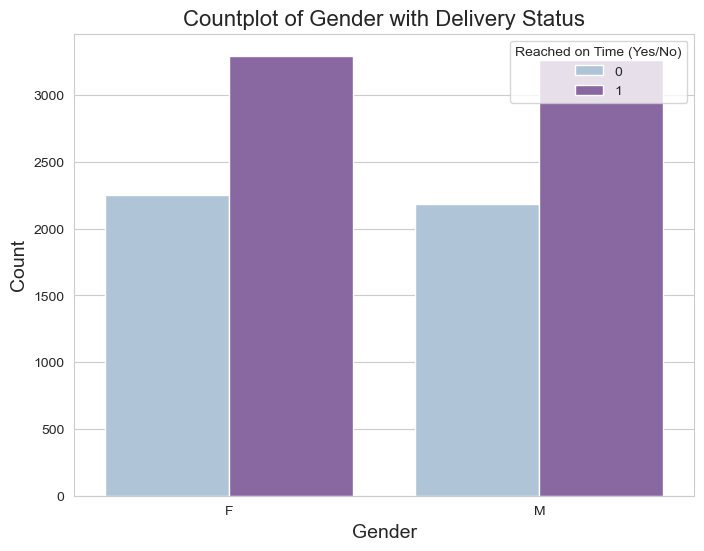

In [149]:

# Set the style for seaborn
sns.set_style("whitegrid")

# Define the figure and axis
plt.figure(figsize=(8, 6))

# Plot a countplot with hue
sns.countplot(data=df3, x="Gender", hue="Reached.on.Time_Y.N", palette="BuPu")

# Set title and labels
plt.title("Countplot of Gender with Delivery Status", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Show the plot
plt.legend(title="Reached on Time (Yes/No)")
plt.show()


**Observations**:  
  
 - Both male & female customers have higher number of products that are not delivered on time.

#### (vi) 'Customer_care_calls_category' & 'Reached.on.Time_Y.N'.

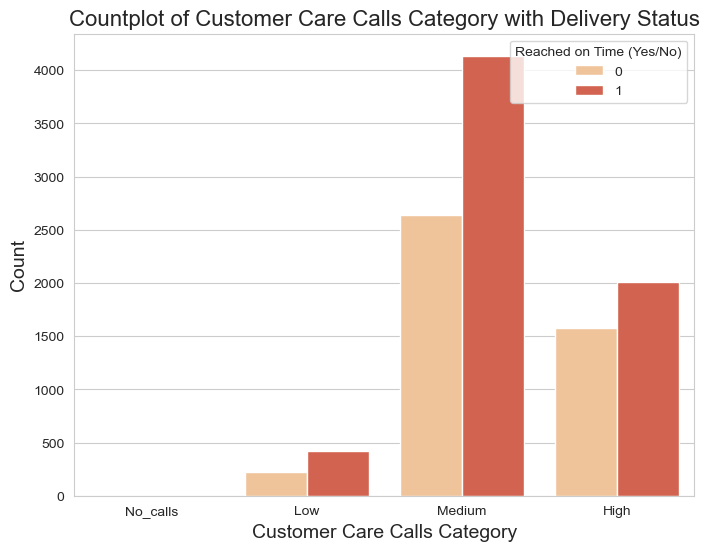

In [150]:

# Set the style for seaborn
sns.set_style("whitegrid")

# Define the figure and axis
plt.figure(figsize=(8, 6))

# Plot a countplot with hue
sns.countplot(data=df3, x="Customer_care_calls_category", hue="Reached.on.Time_Y.N", palette="OrRd")

# Set title and labels
plt.title("Countplot of Customer Care Calls Category with Delivery Status", fontsize=16)
plt.xlabel("Customer Care Calls Category", fontsize=14)
plt.ylabel("Count", fontsize=14)

# Show the plot
plt.legend(title="Reached on Time (Yes/No)")
plt.show()


**Observations**:  
 
 - Customers making 3 or 4 calls have highest number of products that are not delivered on time.
 - No matter how many calls the customers are making, most of them making calls are not getting products delivered on time.
   

## 6.4 Multivariate Analysis

### 6.4.1 Correlation

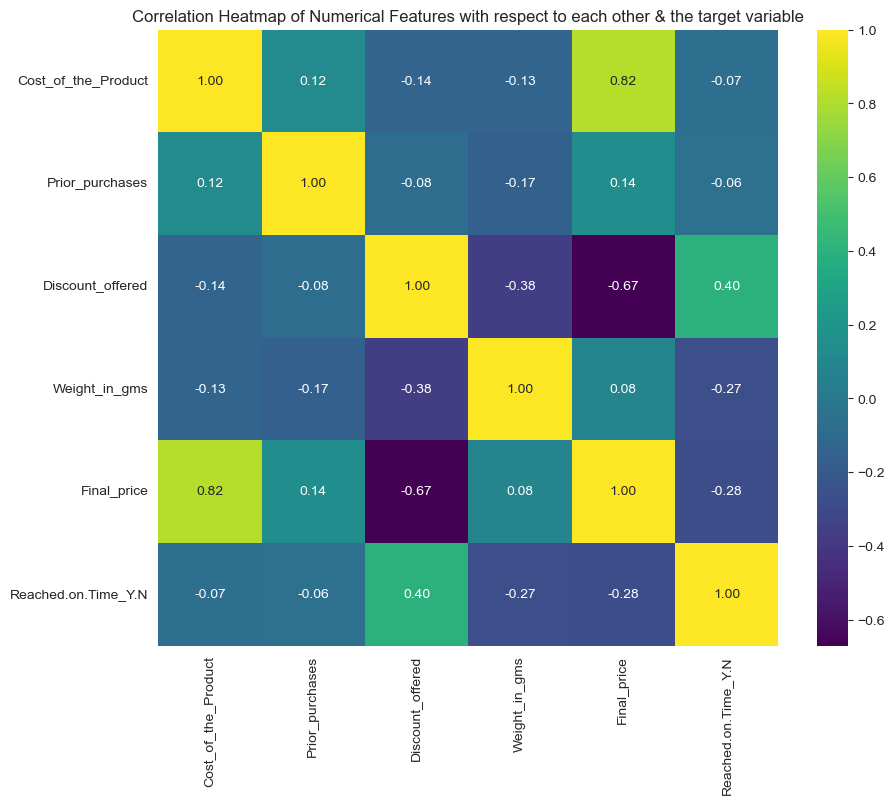

In [146]:
# Selecting the numerical features & target column
num_features = ['Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Final_price','Reached.on.Time_Y.N']

# Calculate the correlation matrix
correlation_matrix = df3[num_features].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features with respect to each other & the target variable')
plt.show()

**Observations** :
 - We can observe that the **cost of the product & prior purchases have very weak negative correlation** with the target variable - Reached on Time.
 - **Weight in gms & Final price have a weak negative correlation** with respect to the target variable - Reached on Time.
 - **Discount Offered has a moderate positive correlation** with the 'Reached on Time' target variable.

### 6.4.2 Pair Plot

C:\Users\Bharath Setty\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


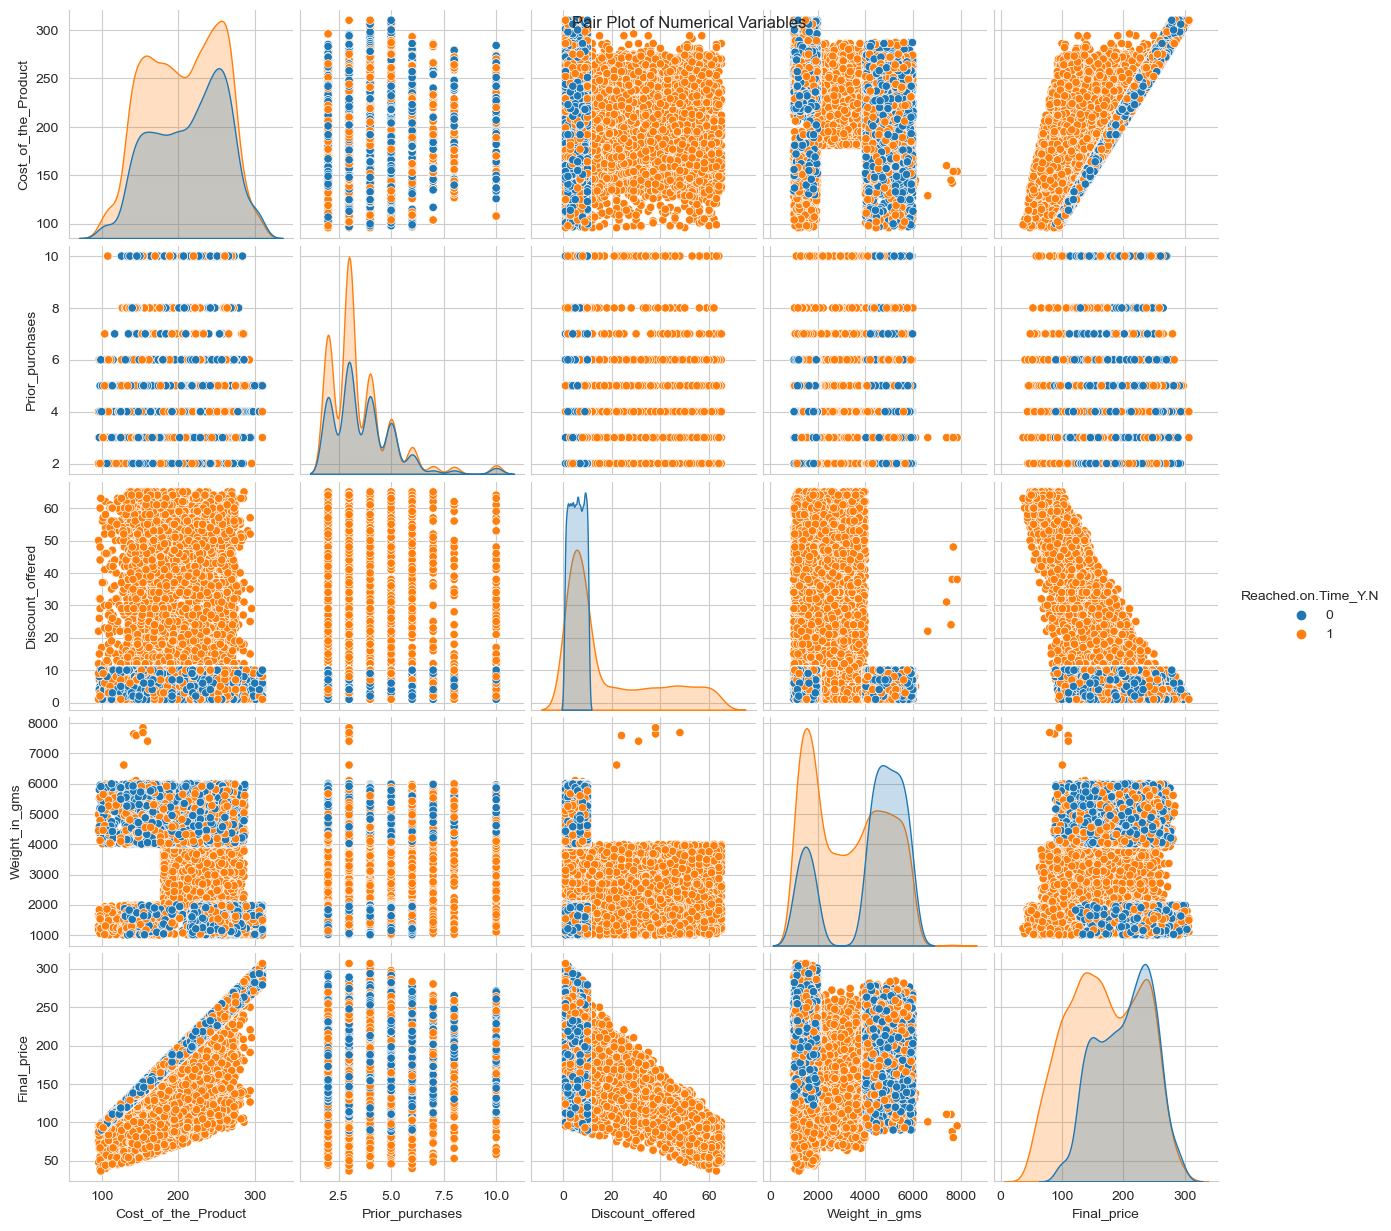

In [154]:
# Pair plot of numerical variables
sns.pairplot(df3, vars=['Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms', 'Final_price'], hue='Reached.on.Time_Y.N')
plt.suptitle('Pair Plot of Numerical Variables')
plt.show()

**OBSERVATIONS**:-   
    
**Diagonal Plots**:  
 - Along the diagonal we can see the kde curve for each numerical variable for both categories of products reaching on time & not on time.    
  
**Off-diagonal Plots**:    
 - The remaining off diagonal plots show scatterplots of pairs of variables.  
 - Each point represents a data point in the dataset.   
 - The position of the point on the x-axis corresponds to the value of one variable, and the position on the y-axis corresponds to the value of the other variable.   
 - The orange color dots & lines represent the category of products reaching customers on time while the blue color dots & lines represent the category of products not reaching the customers on time.    
    
**Interpretation**: 
 - All the **products having a discount of around 15% to 62% have not reached the customer on time at all**.
 - **Products weighing around 2000gms to 4000gms have not reached the customers on time**.
 - In most of the graphs we can see that the data is just scattered suggesting that there is no clear linear relationship.  
 
    

### 6.4.3 Barcharts

#### 6.4.3.A Comparing multivariate columns 
**('Product_importance','Customer_rating' & 'Reached.on.Time_Y.N' columns to see if we can derive any meaningful insights)**  
  
    

<Axes: xlabel='Product_importance', ylabel='Customer_rating'>

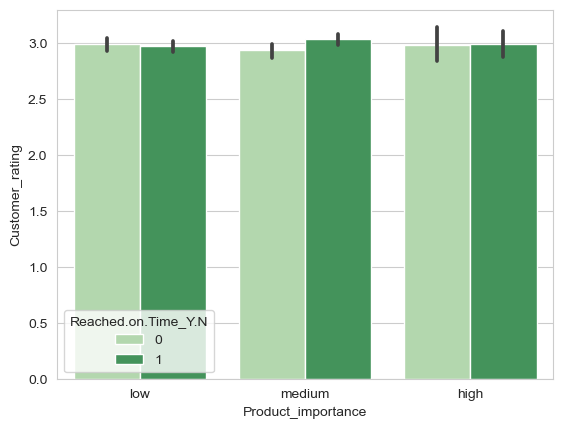

In [156]:
sns.barplot(x=df3['Product_importance'], y=df3['Customer_rating'], hue=df3['Reached.on.Time_Y.N'], palette='Greens')


**Observations**:   
  
 - No much difference in the relation between product Importance & customer rating can be seen with respect to the products reaching the customers on time & not reaching them on time.  

#### 6.4.3.B Comparing multivariate columns 
**('Mode_of_Shipment','Customer_rating' & 'Reached.on.Time_Y.N' columns to see if we can derive any meaningful insights)**


<Axes: xlabel='Mode_of_Shipment', ylabel='Customer_rating'>

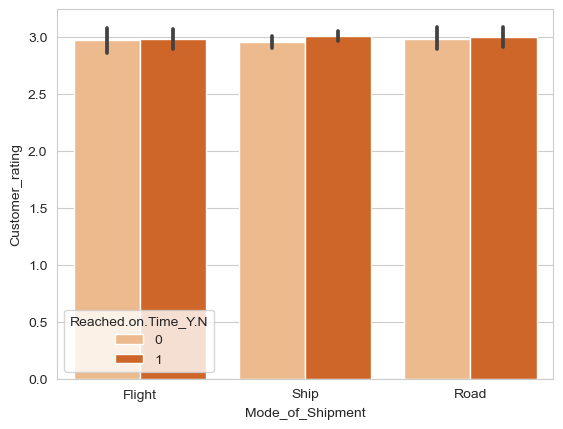

In [158]:
sns.barplot(x=df3['Mode_of_Shipment'], y=df3['Customer_rating'], hue=df3['Reached.on.Time_Y.N'], palette='Oranges')


**Observations**:   
  
 - No much difference in the relation between the Mode of Shipment & Customer Rating can be seen with respect to the products reaching the customers on time & not reaching them on time.  

# 7. MODEL BUILDING

## 7.1 Encoding  
  
The categorical columns having categorical data in alphabets or symbols must be converted in numerical form.
  
The following columns of this dataset are encoded :-

    - Warehouse_block
    - Mode_of_Shipment
    - Product_importance
    - Gender
    - Customer_care_calls_category


### (i) Encoding column 'Warehouse_block'

In [159]:
df3['Warehouse_block'].value_counts()

Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

In [160]:
df4 = df3.copy()
df4['Warehouse_block'] = df4['Warehouse_block'].map({'A':0,'B':1,'C':2,'D':3,'F':4})

In [161]:
df4.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Customer_care_calls_category,Final_price
0,1,3,Flight,4,2,177,3,low,F,44,1233,1,Medium,99.12
1,2,4,Flight,4,5,216,2,low,M,59,3088,1,Medium,88.56
2,3,0,Flight,2,2,183,4,low,M,48,3374,1,Low,95.16
3,4,1,Flight,3,3,176,4,medium,M,10,1177,1,Medium,158.40
4,5,2,Flight,2,2,184,3,medium,F,46,2484,1,Low,99.36


### (ii) Encoding column 'Mode_of_Shipment'

In [162]:
df4['Mode_of_Shipment'].value_counts()

Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

In [163]:
df4['Mode_of_Shipment'] = df4['Mode_of_Shipment'].map({'Ship':0,'Flight':1,'Road':2})

In [164]:
df4.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Customer_care_calls_category,Final_price
0,1,3,1,4,2,177,3,low,F,44,1233,1,Medium,99.12
1,2,4,1,4,5,216,2,low,M,59,3088,1,Medium,88.56
2,3,0,1,2,2,183,4,low,M,48,3374,1,Low,95.16
3,4,1,1,3,3,176,4,medium,M,10,1177,1,Medium,158.40
4,5,2,1,2,2,184,3,medium,F,46,2484,1,Low,99.36


### (iii) Encoding column 'Product_importance'

In [165]:
df4['Product_importance'].value_counts()

Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64

In [166]:
df4['Product_importance'] = df4['Product_importance'].map({'low':0,'medium':1,'high':2})

In [167]:
df4.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Customer_care_calls_category,Final_price
0,1,3,1,4,2,177,3,0,F,44,1233,1,Medium,99.12
1,2,4,1,4,5,216,2,0,M,59,3088,1,Medium,88.56
2,3,0,1,2,2,183,4,0,M,48,3374,1,Low,95.16
3,4,1,1,3,3,176,4,1,M,10,1177,1,Medium,158.40
4,5,2,1,2,2,184,3,1,F,46,2484,1,Low,99.36


### (iv) Encoding column 'Gender'

In [168]:
df4['Gender'].value_counts()

Gender
F    5545
M    5454
Name: count, dtype: int64

In [169]:
df4['Gender'] = df4['Gender'].map({'F':0,'M':1})

In [170]:
df4.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Customer_care_calls_category,Final_price
0,1,3,1,4,2,177,3,0,0,44,1233,1,Medium,99.12
1,2,4,1,4,5,216,2,0,1,59,3088,1,Medium,88.56
2,3,0,1,2,2,183,4,0,1,48,3374,1,Low,95.16
3,4,1,1,3,3,176,4,1,1,10,1177,1,Medium,158.40
4,5,2,1,2,2,184,3,1,0,46,2484,1,Low,99.36


### (v) Encoding column 'Customer_care_calls_category'

In [171]:
df4['Customer_care_calls_category'].value_counts()

Customer_care_calls_category
Medium      6774
High        3587
Low          638
No_calls       0
Name: count, dtype: int64

In [172]:
df4['Customer_care_calls_category'] = df4['Customer_care_calls_category'].map({'Low':0,'Medium':1,'High':2})

In [173]:
df4.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Customer_care_calls_category,Final_price
0,1,3,1,4,2,177,3,0,0,44,1233,1,1.0,99.12
1,2,4,1,4,5,216,2,0,1,59,3088,1,1.0,88.56
2,3,0,1,2,2,183,4,0,1,48,3374,1,0.0,95.16
3,4,1,1,3,3,176,4,1,1,10,1177,1,1.0,158.40
4,5,2,1,2,2,184,3,1,0,46,2484,1,0.0,99.36


### 7.2 Normalization  
  
Convert the numerical data in the range of 0 to 1.

    - Cost_of_the_Product
    - Prior_purchases
    - Discount_offered
    - Weight_in_gms
    - Final_price


In [174]:
df4[['Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms','Final_price']] = MinMaxScaler().fit_transform(df4[['Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms','Final_price']])     
df4.head()
    

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Customer_care_calls_category,Final_price
0,1,3,1,4,2,0.378505,0.125,0,0,0.671875,0.033893,1,1.0,0.231213
1,2,4,1,4,5,0.560748,0.000,0,1,0.906250,0.304894,1,1.0,0.192141
2,3,0,1,2,2,0.406542,0.250,0,1,0.734375,0.346676,1,0.0,0.216561
3,4,1,1,3,3,0.373832,0.250,1,1,0.140625,0.025712,1,1.0,0.450549
4,5,2,1,2,2,0.411215,0.125,1,0,0.703125,0.216654,1,0.0,0.232101


### 7.3 Checking for objects

In [175]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10999 non-null  int64  
 1   Warehouse_block               10999 non-null  int64  
 2   Mode_of_Shipment              10999 non-null  int64  
 3   Customer_care_calls           10999 non-null  int64  
 4   Customer_rating               10999 non-null  int64  
 5   Cost_of_the_Product           10999 non-null  float64
 6   Prior_purchases               10999 non-null  float64
 7   Product_importance            10999 non-null  int64  
 8   Gender                        10999 non-null  int64  
 9   Discount_offered              10999 non-null  float64
 10  Weight_in_gms                 10999 non-null  float64
 11  Reached.on.Time_Y.N           10999 non-null  int64  
 12  Customer_care_calls_category  10999 non-null  float64
 13  F

There are no objects in the data.

### 7.4 Seperating 'FEATURES' & 'TARGET' and converting them into an array

In [176]:
df5 = df4.copy()
features = ['Cost_of_the_Product','Prior_purchases','Discount_offered','Weight_in_gms','Warehouse_block','Mode_of_Shipment','Customer_rating','Product_importance','Gender','Customer_care_calls_category','Final_price']
X = df5[features].values                 
y = df5['Reached.on.Time_Y.N'].values

# I have not considered these columns for model building : 'ID' & 'Customer_care_calls'(instead I have included 'Customer_care_calls_category')

#### Check the output of 'X' & 'y'

In [177]:
X

array([[0.37850467, 0.125     , 0.671875  , ..., 0.        , 1.        ,
        0.23121323],
       [0.56074766, 0.        , 0.90625   , ..., 1.        , 1.        ,
        0.19214119],
       [0.40654206, 0.25      , 0.734375  , ..., 1.        , 0.        ,
        0.21656122],
       ...,
       [0.68224299, 0.375     , 0.046875  , ..., 0.        , 2.        ,
        0.72405372],
       [0.59345794, 0.5       , 0.015625  , ..., 1.        , 2.        ,
        0.67306767],
       [0.27570093, 0.375     , 0.078125  , ..., 0.        , 0.        ,
        0.4035594 ]])

In [178]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [179]:
X.shape

(10999, 11)

In [180]:
y.shape

(10999,)

### 7.5 Splitting the data into 'training set' & 'testing set'

In [181]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 18)

### 7.6 Applying Models/Algorithms  
  
Our dataset is a labelled data meaning it contains the output data. So we must use 'Supervised Algorithms'.  
  
In Supervised Algorithms, since the target variable is a categorical data we must apply 'Classification Algorithms'.  
  
The following Classification Algorithms are applied for this dataset:-  
  
  - Logistic Regression
  - K-Nearest Neighbour
  - Decision Tree Classifier
  - Bagging : Random Forest Classifier
  - Boosting : XgBoost Classifier, Gradient Boosting Classifier


#### Finding the optimal value of 'k' in K-Nearest Neighbour  
  
Using Cross-validation for parameter tuning

In [182]:
df5.shape

(10999, 14)

I have 10,999 datapoints in this dataset so I am roughly considering the value of k from 1 to 499(odd numbers) 

In [183]:

k_list = list(range(1,500,2))
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    

In [184]:

MSE = [round(1-x, 3) for x in cv_scores]
print(MSE)


[0.405, 0.402, 0.406, 0.412, 0.404, 0.406, 0.404, 0.407, 0.403, 0.399, 0.399, 0.401, 0.404, 0.401, 0.403, 0.403, 0.403, 0.399, 0.4, 0.406, 0.406, 0.403, 0.399, 0.401, 0.403, 0.404, 0.402, 0.403, 0.405, 0.398, 0.399, 0.403, 0.402, 0.399, 0.401, 0.399, 0.401, 0.402, 0.401, 0.4, 0.403, 0.404, 0.405, 0.406, 0.406, 0.406, 0.406, 0.409, 0.408, 0.405, 0.404, 0.405, 0.406, 0.406, 0.405, 0.403, 0.406, 0.405, 0.405, 0.407, 0.409, 0.41, 0.409, 0.412, 0.408, 0.406, 0.404, 0.407, 0.408, 0.408, 0.409, 0.409, 0.406, 0.407, 0.406, 0.406, 0.407, 0.407, 0.407, 0.407, 0.408, 0.409, 0.41, 0.411, 0.412, 0.411, 0.413, 0.413, 0.413, 0.411, 0.411, 0.411, 0.411, 0.411, 0.411, 0.411, 0.412, 0.413, 0.411, 0.41, 0.411, 0.412, 0.413, 0.411, 0.411, 0.411, 0.412, 0.411, 0.41, 0.409, 0.409, 0.409, 0.409, 0.411, 0.411, 0.41, 0.412, 0.411, 0.411, 0.411, 0.412, 0.411, 0.411, 0.411, 0.411, 0.411, 0.41, 0.412, 0.412, 0.411, 0.412, 0.412, 0.411, 0.413, 0.412, 0.412, 0.413, 0.413, 0.413, 0.414, 0.412, 0.412, 0.413, 0.412, 0

In [185]:
best_k = k_list[MSE.index(min(MSE))]
print('The optimal number of neighbors is %d.' % best_k)

The optimal number of neighbors is 59.


#### 7.6.1 Import the Models

In [186]:
!pip install xgboost

In [187]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier


#### 7.6.2 Model creation & Model Training

In [188]:
model_log = LogisticRegression(max_iter=500).fit(X_train, y_train)
model_dt = DecisionTreeClassifier().fit(X_train, y_train)
model_ran = RandomForestClassifier().fit(X_train, y_train)
model_xgb = xgb.XGBClassifier().fit(X_train, y_train)
model_gb = GradientBoostingClassifier().fit(X_train, y_train)
model_knn = KNeighborsClassifier(n_neighbors=59).fit(X_train, y_train)

In [189]:
# Checking whether the models are created

print(model_log)
print(model_dt)
print(model_ran)
print(model_xgb)
print(model_gb)
print(model_knn)

LogisticRegression(max_iter=500)
DecisionTreeClassifier()
RandomForestClassifier()
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
GradientBoostingClassifier()
KNeighborsClassifier(n_neighbors=59)


#### 7.6.3 Model Testing

In [190]:
y_pred_log = model_log.predict(X_test)
y_pred_dt = model_dt.predict(X_test)
y_pred_ran = model_ran.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)
y_pred_gb = model_gb.predict(X_test)
y_pred_knn = model_knn.predict(X_test)

#### 7.6.4 Model Evaluation

In [191]:
from sklearn.metrics import accuracy_score

accuracy_log = accuracy_score(y_test, y_pred_log) *100
accuracy_dt = accuracy_score(y_test, y_pred_dt) *100
accuracy_ran = accuracy_score(y_test, y_pred_ran) *100
accuracy_xgb = accuracy_score(y_test, y_pred_xgb) *100
accuracy_gb = accuracy_score(y_test, y_pred_gb) *100
accuracy_knn = accuracy_score(y_test, y_pred_knn) *100


In [192]:
# Printing the accuracy score of each model

print('Accuracy of Logistic Regression model is equal ' + str(round(accuracy_log, 1)) + ' %.')
print('Accuracy of Decision Tree Classifier model is equal ' + str(round(accuracy_dt, 1)) + ' %.')
print('Accuracy of Random Forest Classifier model is equal ' + str(round(accuracy_ran, 1)) + ' %.')
print('Accuracy of XGBoost Classifier model is equal ' + str(round(accuracy_xgb, 1)) + ' %.')
print('Accuracy of Gradient Boosting Classifier model is equal ' + str(round(accuracy_gb, 1)) + ' %.')
print('Accuracy of K Nearest Neighbors Classifier model is equal ' + str(round(accuracy_knn, 1)) + ' %.')


Accuracy of Logistic Regression model is equal 63.6 %.
Accuracy of Decision Tree Classifier model is equal 63.3 %.
Accuracy of Random Forest Classifier model is equal 66.1 %.
Accuracy of XGBoost Classifier model is equal 65.2 %.
Accuracy of Gradient Boosting Classifier model is equal 67.7 %.
Accuracy of K Nearest Neighbors Classifier model is equal 62.4 %.


#### 7.6.5 Finding whether 'Balanced or Unbalanced' Dataset (Since it is a Classification Algorithm)

In [194]:
df5['Reached.on.Time_Y.N'].value_counts()

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

It is almost a 60:40 distribution, hence it is a **balanced dataset** & **Accuracy Score** is used for **Model Evaluation**.  
  
So among all the algorithms performed, **Gradient Boosting Classifier model** is providing me the best result.

 # 8. OUTCOME (Findings & Inferences)

**New Customer Acquisition**: 
 - It is found that the company has a lot of repeat customers, **every customer currently has made atleast a min of 2 prior purchases totally ranging from 2 to 10**.   
 - The company is currently having its presence due to a lot of repeat customers. 
 - The company must focus on expanding its customer base by coming up with strategies to attract new customers eventually expanding its business & profitability.

**Better Customer Support**:
 - By analysing the **customer call data & customer ratings**, it is found that all customers are making calls to enquire about the shipment status of the products & 60% of the customers are rating the company from worst to moderate. 
 - So the company can now focus on reducing the number of customer care calls through setting up of proper media for the communication of delivery status to the customers or by proactive communication. 
 - The company can improvise the quality of customer interactions by resolving issues promptly thereby improvising the customer ratings & attracting new customers thereby improvising the overall business.

**Optimised Pricing Strategy**: 
 - By the observations made over analysing the trends of **cost of the product, product importance & final price** the company can come up with an optimised pricing strategy.
 - It was found that the average cost of the product purchased is around 210US Dollars ranging from 96US Dollars to 254US Dollars with 75% of the customers purchasing equal to or less than 254US Dollars.
 - The average final price at which customers are purchasing falls at 183US Dollars ranging from 36US Dollars to 306US Dollars. It is also found that 75% of the customers are purchasing at a final price of lesser than or equal to 231US Dollars.
 - **Even with or without discount we may observe that around 75% of the customers are purchasing at lesser than or equal to 231US Dollars**.
 - Around **90% of the total sales is currently coming from low & medium important products**, the company may choose to focus more on these categories as well as a strategy to improvise their sales.

**Supply Chain Optimization**:
 - Warehouse block, mode of shipment & product weight observations help us in improvising the existing supply chain.
 - **Warehouse block 'F' is currently getting around 33% of products pickup with the reamaining blocks 'A,B,C & D' forming around 16% each**. So the existence of the warehouse blocks is important for the company with a bit more focus to be provided on block 'F'. 
 - **The majority of shipment of around 67% is happening through 'Shipping' while the other 2 shipments modes like flight & road are constituting to around 16% each**, which is less as compared to shipping. The company can focus more on improvising the shipping strategies or plans.
 - Most of the products currently being purchased lie in the range of **1000gms - 1900gms & 4100gms - 5900gms**. So the company can focus on these weight ranges to plan their shipping accordingly so that it can result in a cost & time effective process.

**Customer Focus with respect to Gender**:
 - The company currently has almost equal distribution of gender customers forming approximately 50% each of male & female.
 - The company must continue catering their products to both genders.
  
**Product reaching customers on Time (Yes or No)**:  
 - It is observed that many products having higher cost are not being delivered on time as compared to the low cost products.
 - Many products with 0-10% discounts are reaching customers on time & mostly those ranging upto 65% are not reaching customers on time.
 - Most products weighing in the range of 1000 gms - 4200 gms are not reaching customers on time while most products weighing in the range of 4300 gms - 6000 gms are reaching on time.
 - Majority of the products falling in the range of 30 US Dollars to 200 US Dollars are not reaching customers on time.
 - All the categories of warehouse blocks, product categories(based on importance), gender, customer ratings, customer calls made & mode of shipments have a higher percentage of products that are not reaching customers on time.
 - It can be easily inferred that the company currently has a huge problem of products not being delivered on time, no matter which mode of shipment, product category, gender, customer calls made is chosen - products are not being delivered on time. 
 - The company should focus on the findings obtained from this analysis to improvise its current system.

**Predictive Modelling**:
 - Around 6 different classifier models were applied to this data & it was found that **Gradient Boosting Classifier model** is providing the best result of 67.7 % of Accuracy Score.

